In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading in data and preliminary cleaning

In [2]:
meta = pd.read_csv('/Users/evelynjohnson/Desktop/METIS/Classification/project/Energy_Water_NYC_Buildings.csv', low_memory=False)

In [3]:
meta.head();

In [4]:
df = meta.copy()

In [5]:
df.shape

(28067, 250)

In [6]:
df.drop(df[df['Primary Property Type - Portfolio Manager-Calculated'] != 'Multifamily Housing'].index, inplace = True)

In [7]:
df.shape

(18751, 250)

In [8]:
columns = df.columns.values.tolist()
columns;

In [9]:
columns_to_drop = ['Property Id', 'NYC Borough, Block and Lot (BBL)','Parent Property Id','Parent Property Name', 'Year Ending',
                   'NYC Building Identification Number (BIN)', 'City', 'Primary Property Type - Self Selected',
                   'Primary Property Type - Portfolio Manager-Calculated', 'National Median Reference Property Type',
                  'List of All Property Use Types at Property', 'Number of Buildings', 'ENERGY STAR Score', 
                   'National Median ENERGY STAR Score', 'Target ENERGY STAR Score', 'Reason(s) for No Score','ENERGY STAR Certification - Year(s) Certified (Score)',
                   'ENERGY STAR Certification - Last Approval Date','Site EUI (kBtu/ft²)', 
                   'National Median Site EUI (kBtu/ft²)',  'Site Energy Use (kBtu)',  'Source EUI (kBtu/ft²)',  
                   'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)', 'Natural Gas Use (therms)', 
                   'Electricity Use - Grid Purchase (kBtu)', 'Electricity Use - Grid Purchase (kWh)', 
                   'Adult Education - Gross Floor Area (ft²)', 'Ambulatory Surgical Center - Gross Floor Area (ft²)', 
                   'Automobile Dealership - Gross Floor Area (ft²)', 'Bank Branch - Gross Floor Area (ft²)', 
                   'Barracks- Gross Floor Area (ft²)', 'College/University - Gross Floor Area (ft²)', 
                   'Convention Center - Gross Floor Area (ft²)', 'Courthouse - Gross Floor Area (ft²)', 
                   'Data Center - Gross Floor Area (ft²)', 'Data Center - UPS System Redundancy', 
                   'Data Center - Cooling Equipment Redundancy', 'Data Center - IT Energy Configuration', 
                   'Data Center - Energy Estimates Applied', 'Data Center - UPS Output Meter (kWh)', 
                   'Data Center - PDU Input Meter (kWh)', 'Data Center - PDU Output Meter (kWh)', 
                   'Data Center - IT Equipment Input Meter (kWh)', 'Data Center - IT Site Energy (kWh)', 
                   'Data Center - IT Source Energy (kBtu)', 'Data Center - PUE', 'Data Center - National Median PUE', 
                   'Distribution Center - Gross Floor Area (ft²)', 'Enclosed Mall - Gross Floor Area (ft²)', 
                   'Energy/Power Station - Gross Floor Area (ft²)', 'Financial Office - Gross Floor Area (ft²)', 
                   'Financial Office - Number of Computers', 'Financial Office - Weekly Operating Hours', 
                   'Financial Office - Number of Workers on Main Shift', 
                   'Fitness Center/Health Club/Gym - Gross Floor Area (ft²)', 'Food Sales - Gross Floor Area (ft²)', 
                   'Food Service - Gross Floor Area (ft²)', 
                   'Hospital (General Medical & Surgical)- Full Time Equivalent (FTE) Workers', 
                   'Hospital (General Medical & Surgical) - Gross Floor Area (ft²)', 
                   'Hospital (General Medical & Surgical) - Laboratory', 
                   'Hospital (General Medical & Surgical) - Licensed Bed Capacity', 
                   'Hospital (General Medical & Surgical) - Number of MRI Machines', 
                   'Hospital (General Medical & Surgical) - MRI Density (Number per 1,000 sq ft)', 
                   'Hospital (General Medical & Surgical) - Number of Staffed Beds', 
                   'Hospital (General Medical & Surgical) - Staffed Bed Density (Number per 1,000 sq ft)', 
                   'Hospital (General Medical & Surgical) - Number of Workers on Main Shift', 
                   'Hospital (General Medical & Surgical) - Number of Workers on Main Shift Density (Number per 1,000 sq ft)', 
                   'Hospital (General Medical & Surgical) - Percent That Can Be Cooled', 
                   'Hospital (General Medical & Surgical) - Percent That Can Be Heated', 
                   'Medical Office - Gross Floor Area (ft²)', 'Medical Office - Number of Computers', 
                   'Medical Office - Number of MRI Machines', 'Medical Office - Number of Workers on Main Shift', 
                   'Medical Office - Percent That Can Be Cooled', 'Medical Office - Percent That Can Be Heated', 
                   'Medical Office - Weekly Operating Hours', 
                   'Outpatient Rehabilitation/Physical Therapy - Gross Floor Area (ft²)', 
                   'Urgent Care/Clinic/Other Outpatient - Gross Floor Area (ft²)', 'Hotel - Gross Floor Area (ft²)', 
                   'Hotel - Gym/fitness  Center Floor Area (ft²)', 'K-12 School - Gross Floor Area (ft²)', 
                   'Pre-school/Daycare - Gross Floor Area (ft²)', 'Laboratory - Gross Floor Area (ft²)', 
                   'Mailing Center/Post Office - Gross Floor Area (ft²)', 'Movie Theater - Gross Floor Area (ft²)', 
                   'Manufacturing/Industrial Plant - Gross Floor Area (ft²)', 
                   'Residence Hall/Dormitory - Gross Floor Area (ft²)', 
                   'Non-Refrigerated Warehouse - Gross Floor Area (ft²)', 'Office - Gross Floor Area (ft²)', 
                   'Office - Number of Computers', 'Office - Number of Workers on Main Shift', 
                   'Office - Percent That Can Be Cooled', 'Office - Percent That Can Be Heated', 
                   'Office - Weekly Operating Hours', 'Office - Worker Density (Number per 1,000 sq ft)', 
                   'Other - Gross Floor Area (ft²)', 'Museum - Gross Floor Area (ft²)', 
                   'Performing Arts - Gross Floor Area (ft²)', 'Refrigerated Warehouse - Gross Floor Area (ft²)', 
                   'Restaurant - Gross Floor Area (ft²)', 'Restaurant - Weekly Operating Hours', 
                   'Restaurant - Worker Density (Number per 1,000 sq ft)', 'Retail Store - Gross Floor Area (ft²)', 
                   'Retail Store - Number of Walk-in Refrigeration/Freezer Units', 
                   'Retail Store - Number of Open or Closed Refrigeration/Freezer Units', 
                   'Self-Storage Facility - Gross Floor Area (ft²)', 
                   'Senior Living Community - Gross Floor Area (ft²)', 
                   'Senior Living Community - Living Unit Density (Number per 1,000 sq ft)', 
                   'Social/Meeting Hall - Gross Floor Area (ft²)', 'Supermarket/Grocery - Gross Floor Area (ft²)', 
                   'Supermarket/Grocery - Number of Open or Closed Refrigeration/Freezer Units', 
                   'Supermarket/Grocery - Number of Walk-in Refrigeration/Freezer Units', 
                   'Wholesale Club/Supercenter- Gross Floor Area (ft²)', 
                   'Wholesale Club/Supercenter- Exterior Entrance to the Public', 
                   'Wastewater Treatment Plant - Gross Floor Area (ft²)', 'Worship Facility - Gross Floor Area (ft²)',
                   'Estimated Data Flag - Electricity (Grid Purchase)', 'Estimated Data Flag - Natural Gas', 
                   'Estimated Data Flag - Fuel Oil (No. 1)', 'Estimated Data Flag - Fuel Oil (No. 2)', 
                   'Estimated Data Flag - Fuel Oil (No. 4)', 'Estimated Data Flag - Fuel Oil (No. 5 and No. 6)', 
                   'Estimated Data Flag - District Steam', 
                   'Estimated Data Flag - Municipally Supplied Potable Water: Mixed Indoor/Outdoor Use', 
                   'Estimated Values - Energy', 'Estimated Values - Water', 'Alert - Data Center Issue (with Estimates, IT Configuration, or IT Meter)', 
                   'Alert - Energy Meter has less than 12 full calendar months of data', 'Alert - Energy Meter has gaps', 
                   'Alert - Energy Meter has overlaps', 'Alert - Energy - No meters selected for metrics', 
                   'Alert - Energy Meter has single entry more than 65 days', 
                   'Alert - Water Meter has less than 12 full calendar months of data', 
                   'Alert - Property has no uses', 'Default Values', 'Temporary Values', 
                   'Property GFA - Self-Reported (ft²)', 'Third Party Certification', 
                   'Third Party Certification Date Anticipated', 'Third Party Certification Date Achieved', 
                   'Last Modified Date - Property', 'Last Modified Date - Electric Meters', 
                   'Last Modified Date - Gas Meters', 'Last Modified Date - Non-Electric Non-Gas Energy Meters', 
                   'Last Modified Date - Water Meters', 'Last Modified Date - Property Use', 
                   'Number of Active Energy Meters - Total', 'Number of Active Energy Meters - Used to Compute Metrics',
                   'Number of Active Energy Meters - Not Used to Compute Metrics', 'Number of Active IT Meters', 
                   'Generation Date', 'Release Date','Propane Use (kBtu)', 'District Hot Water Use (kBtu)', 'Annual Maximum Demand (kW)', 
                   'Annual Maximum Demand (MM/YYYY)', 'Annual Maximum Demand (Meter Name (Meter ID))', 'National Median Total GHG Emissions (Metric Tons CO2e)',
                   'Percent of RECs Retained', 'Outdoor Water Use (All Water Sources) (kgal)', 'Municipally Supplied Potable Water - Outdoor Use (kgal)',
                   'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)', 
                   'Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu)', 
                   'Fuel Oil #1 Use (kBtu)','Fuel Oil #2 Use (kBtu)','Fuel Oil #4 Use (kBtu)',
                   'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)',
                   'District Chilled Water Use (kBtu)']

df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
df.shape

(18751, 79)

In [11]:
df['Construction Status'].value_counts()

Existing    18720
Test           31
Name: Construction Status, dtype: int64

In [12]:
df.drop(df[df['Construction Status'] == 'Test'].index, inplace = True)

In [13]:
df.replace('Not Available', np.nan, inplace=True)
df.replace('Insufficient access', np.nan, inplace=True)

In [14]:
df['na_sum']=df.isnull().sum(axis=1)
df.na_sum.describe()

count    18720.000000
mean        19.903365
std          5.535997
min          6.000000
25%         17.000000
50%         19.000000
75%         22.000000
max         55.000000
Name: na_sum, dtype: float64

(array([7.360e+02, 1.715e+03, 8.440e+03, 5.747e+03, 1.410e+03, 2.730e+02,
        1.190e+02, 2.130e+02, 6.100e+01, 6.000e+00]),
 array([ 6. , 10.9, 15.8, 20.7, 25.6, 30.5, 35.4, 40.3, 45.2, 50.1, 55. ]),
 <BarContainer object of 10 artists>)

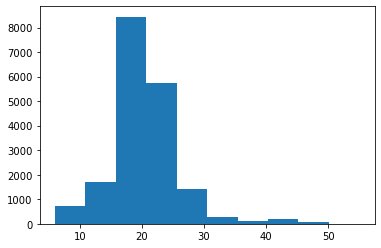

In [15]:
plt.hist(df.na_sum)

In [16]:
df.dropna(axis=0, subset=['Latitude', 'Longitude'], inplace=True)

In [17]:
df.shape

(18137, 80)

In [18]:
df['Multifamily Housing - Government Subsidized Housing'].value_counts()

No          10948
100% Yes     1700
Name: Multifamily Housing - Government Subsidized Housing, dtype: int64

In [19]:
df['Multifamily Housing - Government Subsidized Housing'].replace({'No':0, '100% Yes':1}, inplace=True)
df['Multifamily Housing - Government Subsidized Housing'].value_counts()

0.0    10948
1.0     1700
Name: Multifamily Housing - Government Subsidized Housing, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18137 entries, 48 to 28065
Data columns (total 80 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Property Name                                                                                                      18137 non-null  object 
 1   Address 1                                                                                                          18137 non-null  object 
 2   Postcode                                                                                                           18137 non-null  object 
 3   Largest Property Use Type                                                                                          18137 non-null  object 
 4   Largest Property Use 

In [21]:
incorrect_type_columns =  [4,6,8, *range(15,44), *range(45,59), *range(60,72)]

columns_to_convert = df.iloc[:,incorrect_type_columns]

for column in columns_to_convert:
    df[column] = df[column].astype(float)

In [22]:
df['ENERGY STAR Certification - Eligibility'].value_counts()

No     13529
Yes     4608
Name: ENERGY STAR Certification - Eligibility, dtype: int64

In [23]:
df['ENERGY STAR Certification - Eligibility'].replace({'No':0, 'Yes':1}, inplace=True)
df['ENERGY STAR Certification - Eligibility'].value_counts()

0    13529
1     4608
Name: ENERGY STAR Certification - Eligibility, dtype: int64

In [24]:
df['LEED US Project ID'].replace(to_replace=['1000120270','8000011385', '10002686', '10086896', '10089648'], value=1,inplace=True)

In [25]:
df['Metered Areas (Energy)'].value_counts()

Whole Property                                                                                                                          17861
Another configuration                                                                                                                       4
Common areas (all energy loads)                                                                                                             3
Tenant Heating, Common Area Heating, Common Area Cooling, Common Area Hot Water, Common Area Plug Load/Electricity, Tenant Hot Water        1
Common Area Hot Water, Common Area Cooling, Common Area Plug Load/Electricity, Tenant Hot Water, Common Area Heating, Tenant Heating        1
Tenant Plug Load/Electricity                                                                                                                1
Common Area Hot Water, Tenant Heating, Common Area Cooling, Common Area Heating, Tenant Hot Water, Common Area Plug Load/Electricity        1
Common

In [26]:
df['Metered Areas (Energy)'].replace(to_replace=['Another configuration','Common areas (all energy loads)','Common Area Cooling, Common Area Heating, Common Area Hot Water, Common Area Plug Load/Electricity, Tenant Heating, Tenant Hot Water', 'Tenant Heating, Common Area Heating, Common Area Cooling, Common Area Hot Water, Common Area Plug Load/Electricity, Tenant Hot Water', 'Common Area Plug Load/Electricity, Tenant Hot Water','Common Area Hot Water, Tenant Heating, Common Area Cooling, Common Area Heating, Tenant Hot Water, Common Area Plug Load/Electricity', 'Common Area Hot Water, Common Area Cooling, Common Area Plug Load/Electricity, Tenant Hot Water, Common Area Heating, Tenant Heating', 'Tenant Plug Load/Electricity'],value=0, inplace=True)
df['Metered Areas (Energy)'].replace(to_replace='Whole Property', value=1, inplace=True)


In [27]:
df['Metered Areas (Water)'].replace(to_replace=['Another configuration','Common areas (all energy loads)', 'Tenant and/or common areas (partial energy loads)'], 
                                                 value=0, inplace=True)
df['Metered Areas (Water)'].replace(to_replace='Whole Property', value=1, inplace=True)

In [28]:
y = df['ENERGY STAR Certification - Eligibility']
cat_columns = ['Property Name', 'Postcode', 'Address 1', 'Largest Property Use Type','2nd Largest Property Use Type',
                     '3rd Largest Property Use Type','Construction Status', 'ENERGY STAR Certification - Eligibility',
                    'Multifamily Housing - Resident Population Type','Borough', 'NTA', 'Community Board', 'Council District', 'Census Tract',
                    'Latitude', 'Longitude']


X = df.drop(cat_columns, axis=1).copy()

In [29]:
y.value_counts()

0    13529
1     4608
Name: ENERGY STAR Certification - Eligibility, dtype: int64

In [30]:
X.shape

(18137, 64)

In [31]:
NA_values_to_0 = ['2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)','Metered Areas (Energy)', 'Metered Areas (Water)', 'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)', 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)', 'Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh)', 'Electricity Use – Generated from Onsite Renewable Systems (kWh)', 'LEED US Project ID','Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh)', 'Avoided Emissions - Onsite Green Power (Metric Tons CO2e)', 'Green Power - Onsite (kWh)', 'Percent of Total Electricity Generated from Onsite Renewable Systems', 'Percent of Electricity that is Green Power','Multifamily Housing - Government Subsidized Housing', 'Parking - Gross Floor Area (ft²)', 'Parking - Completely Enclosed Parking Garage Size (ft²)', 'Parking - Open Parking Lot Size (ft²)', 'Parking - Partially Enclosed Parking Garage Size (ft²)', 'Property GFA - Calculated (Parking) (ft²)', 'Municipally Supplied Potable Water - Mixed Indoor/Outdoor Use (kgal)']
NA_values_to_median = ['Weather Normalized Site EUI (kBtu/ft²)','Weather Normalized Site Energy Use (kBtu)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Weather Normalized Site Electricity (kWh)', 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)', 'Green Power - Onsite (kWh)' , 'Green Power - Offsite (kWh)', 'Green Power - Onsite and Offsite (kWh)', 'Total GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions Intensity (kgCO2e/ft²)','Direct GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions Intensity (kgCO2e/ft²)', 'Direct GHG Emissions Intensity (kgCO2e/ft²)',  'Indirect GHG Emissions (Metric Tons CO2e)', 'Net Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions Intensity (kgCO2e/ft²)', 'eGRID Output Emissions Rate (kgCO2e/MBtu)', 'Multifamily Housing - Number of Bedrooms', 'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)', 'Multifamily Housing - Number of Laundry Hookups in All Units', 'Multifamily Housing - Number of Laundry Hookups in Common Area(s)',  'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)', 'Multifamily Housing - Total Number of Residential Living Units', 'Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)', 'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)', 'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)', 'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)', 'Multifamily Housing - Percent That Can Be Cooled', 'Multifamily Housing - Percent That Can Be Heated', 'Water Use (All Water Sources) (kgal)', 'Indoor Water Use (All Water Sources) (kgal)', 'Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal)', 'Municipally Supplied Potable Water - Indoor Use (kgal)']

for column in NA_values_to_0:
    X[column].fillna(0,axis=0, inplace=True)

for column in NA_values_to_median:
    median = np.median(X[column].dropna())
    X[column].fillna(median, axis=0, inplace=True)

In [32]:
len(NA_values_to_0), len(NA_values_to_median)

(21, 38)

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18137 entries, 48 to 28065
Data columns (total 64 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Largest Property Use Type - Gross Floor Area (ft²)                                                                 18137 non-null  float64
 1   2nd Largest Property Use - Gross Floor Area (ft²)                                                                  18137 non-null  float64
 2   3rd Largest Property Use Type - Gross Floor Area (ft²)                                                             18137 non-null  float64
 3   Year Built                                                                                                         18137 non-null  int64  
 4   Occupancy            

In [120]:
classification_df = pd.concat([X, y], axis=1)
classification_df = classification_df.to_csv('classification_df.csv')

# Splitting data into train, validation, and test subsets

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

# Exploring the training set 

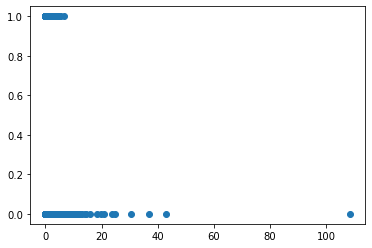

In [107]:
plt.scatter(X['Indirect GHG Emissions Intensity (kgCO2e/ft²)'], y)

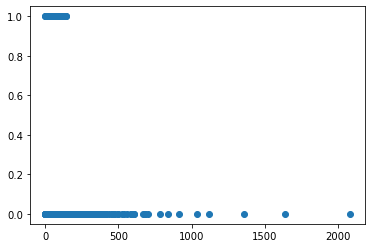

In [108]:
plt.scatter(X['Weather Normalized Site EUI (kBtu/ft²)'], y)

In [109]:
train_df = pd.concat([X_train, y_train], axis=1)

NameError: name 'tick' is not defined

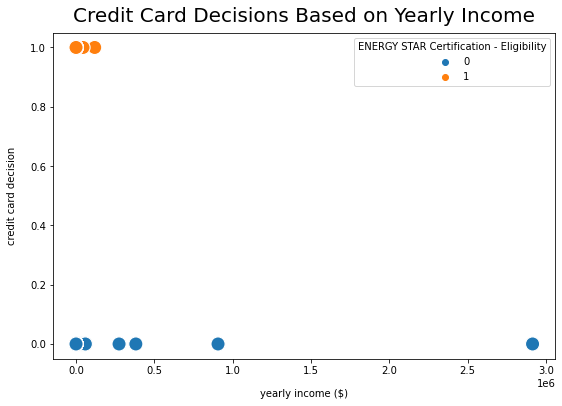

In [110]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh)', y='ENERGY STAR Certification - Eligibility', hue='ENERGY STAR Certification - Eligibility', data=train_df, s=200)
plt.xlabel("yearly income ($)", labelpad=13)
plt.ylabel("credit card decision", labelpad=13)
plt.title("Credit Card Decisions Based on Yearly Income", y=1.015, fontsize=20)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

In [ ]:
np.mean(y_train)

## Preprocessing

In [111]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, roc_curve

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Building Logistic Regression Model

In [113]:
lr_model = LogisticRegression(max_iter=200, C=10000)
lr_model.fit(X_train, y_train)


/Users/evelynjohnson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000, max_iter=200)

In [114]:
y_pred_val = lr_model.predict(X_test)
y_prob_pred_val = lr_model.predict_proba(X_test)[:,1]

In [115]:
lr_model.score(X_train, y_train)
#f1_score(y_pred_val, y_val)

0.8788338272796196

In [116]:
cm = confusion_matrix(y_test, y_pred_val)
cm

array([[2542,  152],
       [ 316,  618]])

In [117]:
lr_auc = roc_auc_score(y_test, y_pred_val)
lr_auc

0.8026242788717571

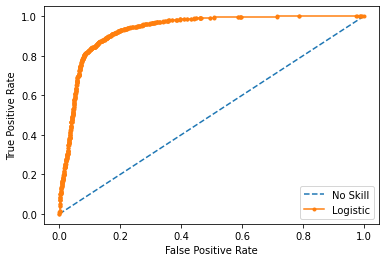

In [118]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pred_val)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()